Import basic tools and Dance Object, used for turning joint-position data into a dataframe of features

In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append("../../")
from DanceProj1.DanceObj import Dance

import matplotlib.pyplot as plt
import seaborn as sns

Use Dance class obj on data and make feature-dataframe. See data_proc.py for details.

In [2]:
from DanceProj1.data_proc import get_data

aistpath = '../../aist_keypoints' #path to 3d keypoints data
dataBM, dataFM = get_data(aistpath)    #get data. Comes with joint-position-frame arrays and an id

Make sure data is loaded

In [3]:
print('data is dict with keys = genres', dataBM.keys())
print('values are tuples (pairs) = (posdata, id)')
print('first break piece data shape (frames, joints, xyz):', dataBM['Break'][0][0].shape)
print('id of first break piece: ', dataBM['Break'][0][1])

data is dict with keys = genres dict_keys(['Break', 'Pop', 'Lock', 'Midhop', 'LAhop', 'House', 'Waack', 'Krump', 'Street Jazz', 'Ballet Jazz'])
values are tuples (pairs) = (posdata, id)
first break piece data shape (frames, joints, xyz): (15, 443, 3)
id of first break piece:  gBR_sBM_cAll_d05_mBR5_ch10


Turn the data into Dance objects. This is a class that has methods for computing features. See DanceObj.py for details - it is contained in data_to_features.

The variable "sparse" sets whether all of the features in DanceObj are pulled as data (sparse=False), or only a selected subset of the features (sparse=True) 

In [4]:
from DanceProj1.data_proc import data_to_features

dfBM, dfFM = data_to_features(dataBM, dataFM)

there were index errors on 0 dances


In [5]:
print('There are', len(dfFM.index), 'Advanced sequences and', len(dfBM.index), 'Basic sequences')

There are 199 Advanced sequences and 1199 Basic sequences


Check the dataframes

In [6]:
print('There are', len(dfBM.columns)-2, 'features, plus the genre and id columns')
dfBM.head()

There are 21 features, plus the genre and id columns


id  Genre  sacrumstd  sacrumjerkmag  sacrumjerky  \
0  gBR_sBM_cAll_d05_mBR5_ch10  Break   5.992518     848.679147     2.071357   
1  gBR_sBM_cAll_d05_mBR1_ch03  Break  10.249365    1200.340658    -7.119799   
2  gBR_sBM_cAll_d06_mBR3_ch09  Break   6.891047     886.781045    10.341320   
3  gBR_sBM_cAll_d06_mBR2_ch08  Break   9.965547    1540.719848    -6.950339   
4  gBR_sBM_cAll_d05_mBR4_ch10  Break   6.278031     695.688095   -12.836462   

   angularmomentumxz  angularmomentumy  angularmomentumxzstd  \
0         925.392047       -567.378827           4046.137286   
1       -1534.771429        902.808415           5323.030246   
2        -679.871530       4267.835425           3159.626132   
3        1204.119479        -10.956133           5606.692007   
4         631.332889       -505.157613           5016.263532   

   angularmomentumystd    ypeaks  ...  ankleacceleration  ankleaccstd  \
0          2972.010425  0.020316  ...         318.962386   250.883127   
1          1358.511140  0.025000  ...         313.218737   136.682169   
2          3289.583241  0.019084  ...         320.970867   223.629090   
3          6977.001949  0.034722  ...         368.445909   287.946463   
4          2715.459404  0.020833  ...         283.075792   215.987937   

   ankleheight  ankleheightstd  cervicalbend  cervicalbendstd  \
0    46.663169        5.928026      0.835976         0.774991   
1    55.947479       11.940312      0.585751         0.477606   
2    45.538936        8.603254      1.587365         0.324341   
3    50.457224        9.825650      0.782809         0.745396   
4    44.370835        3.275988      1.406662         0.759804   

   cervicalbendrate  cervicalbendratestd  Expandedness  Expandedness_std  
0          0.004434             0.134842   1067.622148         50.415361  
1         -0.000287             0.054526   1083.575293        142.153402  
2          0.000547             0.051891    985.561049        104.975424  
3         -0.003136             0.085618   1020.270512         80.674363  
4          0.004191             0.097305   1107.946863         49.744991  

[5 rows x 23 columns]

In [7]:
print(dfFM['Genre'].unique())

['Break' 'Pop' 'Lock' 'Midhop' 'LAhop' 'House' 'Waack' 'Krump'
 'Street Jazz' 'Ballet Jazz']


In [8]:
#list all the features
print(dfBM.columns)

Index(['id', 'Genre', 'sacrumstd', 'sacrumjerkmag', 'sacrumjerky',
       'angularmomentumxz', 'angularmomentumy', 'angularmomentumxzstd',
       'angularmomentumystd', 'ypeaks', 'xzpeaks', 'wristacceleration',
       'wristaccstd', 'ankleacceleration', 'ankleaccstd', 'ankleheight',
       'ankleheightstd', 'cervicalbend', 'cervicalbendstd', 'cervicalbendrate',
       'cervicalbendratestd', 'Expandedness', 'Expandedness_std'],
      dtype='object')


In [9]:
#scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfFM_scaled = pd.DataFrame(scaler.fit_transform(dfFM.drop(['Genre', 'id'], axis=1)), columns=dfFM.drop(['Genre', 'id'], axis=1).columns)
dfBM_scaled = pd.DataFrame(scaler.fit_transform(dfBM.drop(['Genre', 'id'], axis=1)), columns=dfBM.drop(['Genre', 'id'], axis=1).columns)

dfFM_scaled['Genre'] = dfFM['Genre']
dfBM_scaled['Genre'] = dfBM['Genre']


In [10]:
#scale the data within each genre
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#get all the 'Break' pieces, then scale them
dfABreak = dfBM[dfBM['Genre'] == 'Break']
dfABreak_scaled = pd.DataFrame(scaler.fit_transform(dfABreak.drop(['Genre', 'id'], axis=1)), columns=dfABreak.drop(['Genre', 'id'], axis=1).columns)
dfABreak_scaled['Genre'] = dfABreak['Genre']
dfABreak_scaled['id'] = dfABreak['id']

#get all the 'HipHop' pieces, then scale them
dfAHipHop = dfBM[dfBM['Genre'] == 'HipHop']
dfAHipHop_scaled = pd.DataFrame(scaler.fit_transform(dfAHipHop.drop(['Genre', 'id'], axis=1)), columns=dfAHipHop.drop(['Genre', 'id'], axis=1).columns)
dfAHipHop_scaled['Genre'] = dfAHipHop['Genre']
dfAHipHop_scaled['id'] = dfAHipHop['id']

#ask chat how to do these in a loop with f'strings



ValueError: Found array with 0 sample(s) (shape=(0, 17)) while a minimum of 1 is required by StandardScaler.

In [10]:
# group by genre
grouped = dfFM_scaled.groupby('Genre')

# create separate dataframes for each genre
dfABJazz_scaled = grouped.get_group('Ballet Jazz').drop(['Genre'], axis=1)
dfABreak_scaled = grouped.get_group('Break').drop(['Genre'], axis=1)
dfAPop_scaled = grouped.get_group('Pop').drop(['Genre'], axis=1)
dfALock_scaled = grouped.get_group('Lock').drop(['Genre'], axis=1)
dfAMidhop_scaled = grouped.get_group('Midhop').drop(['Genre'], axis=1)
dfALAhop_scaled = grouped.get_group('LAhop').drop(['Genre'], axis=1)
dfAHouse_scaled = grouped.get_group('House').drop(['Genre'], axis=1)
dfAWaack_scaled = grouped.get_group('Waack').drop(['Genre'], axis=1)
dfAKrump_scaled = grouped.get_group('Krump').drop(['Genre'], axis=1)
dfASJazz_scaled = grouped.get_group('Street Jazz').drop(['Genre'], axis=1)

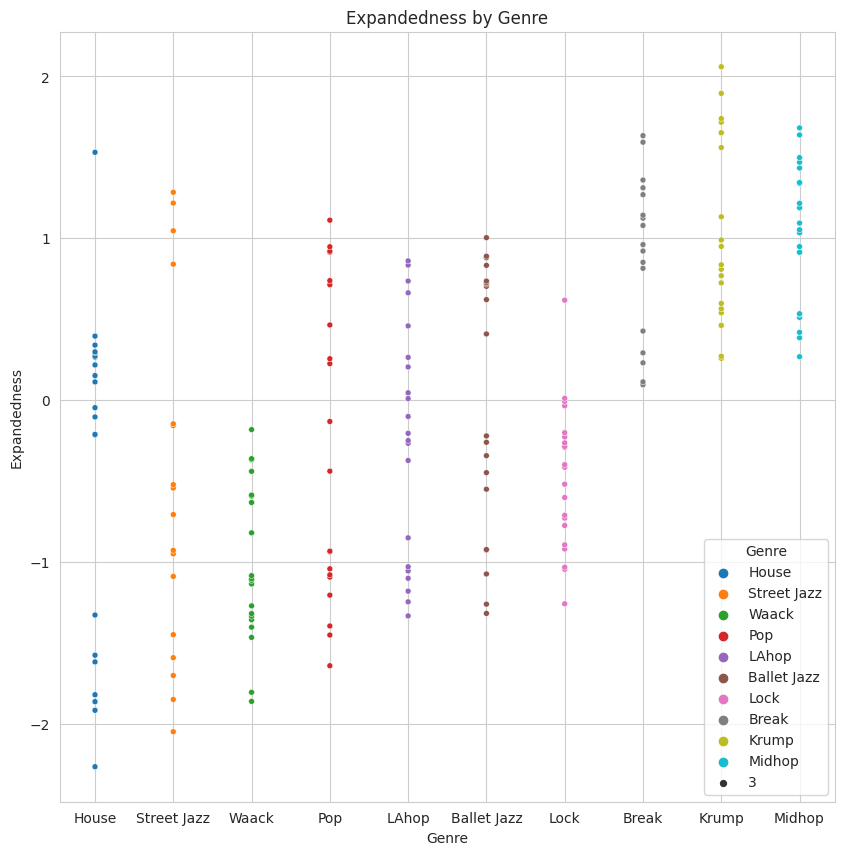

In [11]:
#scatter plot of Expandedness on y axis, dance genre on X axis
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
sns.scatterplot(data=dfFM_scaled[['Expandedness', 'Genre']].sort_values(by='Expandedness'), x='Genre', y='Expandedness', hue='Genre', size=3)
plt.title('Expandedness by Genre')
#plt.savefig('../plots/feature_plots/Expandednessscatter.png')
plt.show()



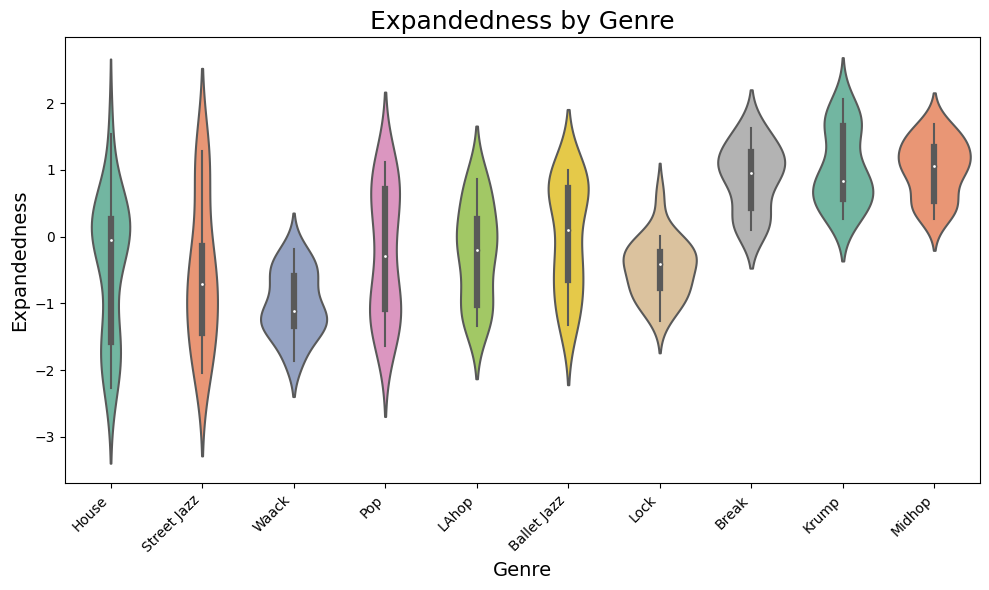

In [11]:
#Violion plot of Expandedness on y axis, dance genre on X axis, ordered by expandedness
plt.figure(figsize=(10, 6))
colors = sns.color_palette('Set2', n_colors=10)
sns.violinplot(data=dfFM_scaled.sort_values(by='Expandedness'), x='Genre', y='Expandedness', palette=colors)
plt.title('Expandedness by Genre', fontsize=18)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Expandedness', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../plots/feature_plots/Expandednessviolin.png')
plt.show()

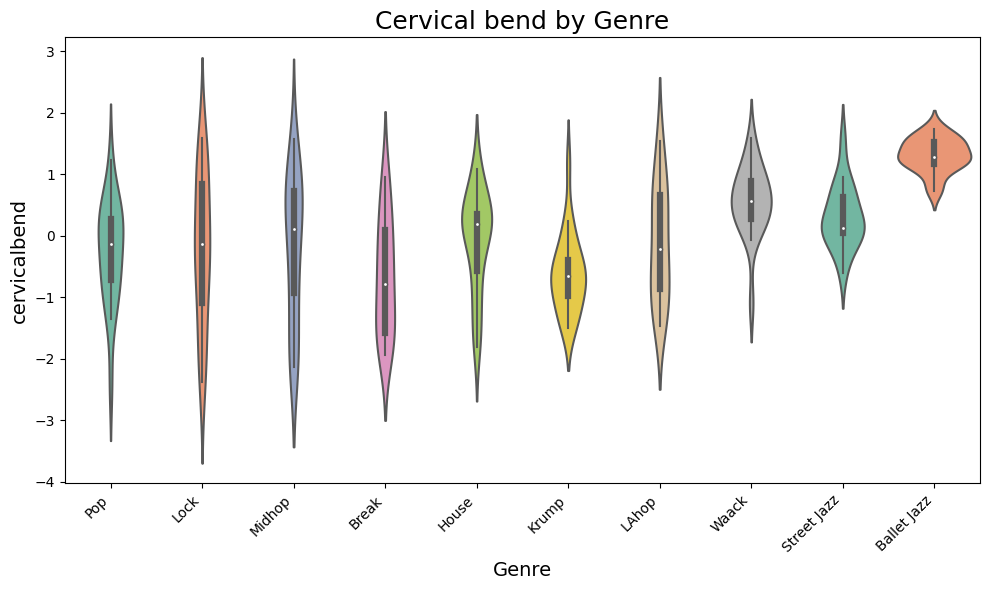

In [14]:
#Violion plot of cervicalbend on y axis, dance genre on X axis, ordered by cervicalbend
plt.figure(figsize=(10, 6))
colors = sns.color_palette('Set2', n_colors=10)
sns.violinplot(data=dfFM_scaled.sort_values(by='cervicalbend'), x='Genre', y='cervicalbend', palette=colors)
plt.title('Cervical bend by Genre', fontsize=18)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('cervicalbend', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
#plt.savefig('../plots/feature_plots/cervicalbendviolin.png')
plt.show()

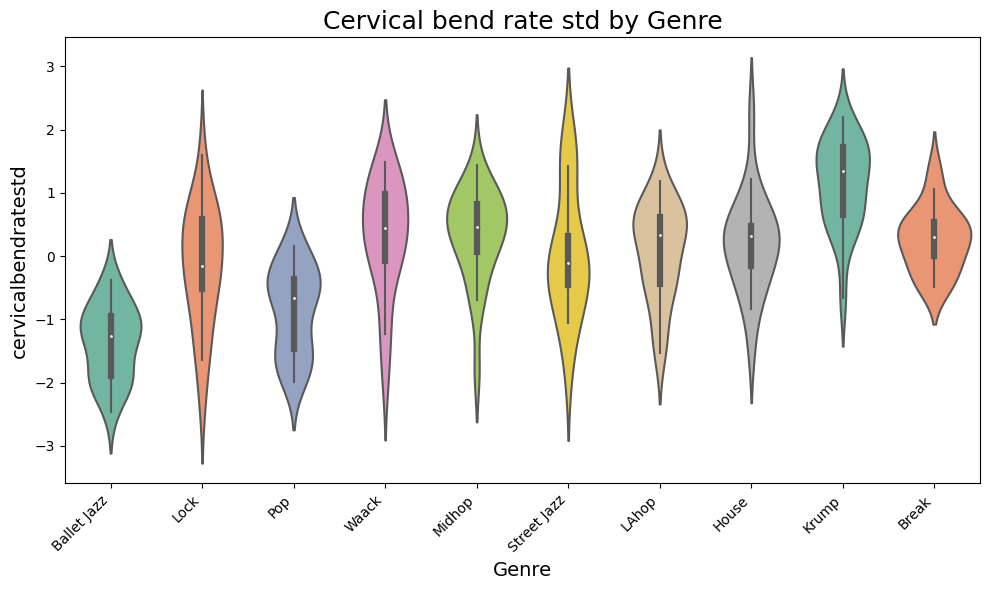

In [16]:
#Violion plot of cervicalbendratestd on y axis, dance genre on X axis, ordered by cervicalbendratestd
plt.figure(figsize=(10, 6))
colors = sns.color_palette('Set2', n_colors=10)
sns.violinplot(data=dfFM_scaled.sort_values(by='cervicalbendratestd'), x='Genre', y='cervicalbendratestd', palette=colors)
plt.title('Cervical bend rate std by Genre', fontsize=18)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('cervicalbendratestd', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
#plt.savefig('../plots/feature_plots/cervicalbendviolin.png')
plt.show()

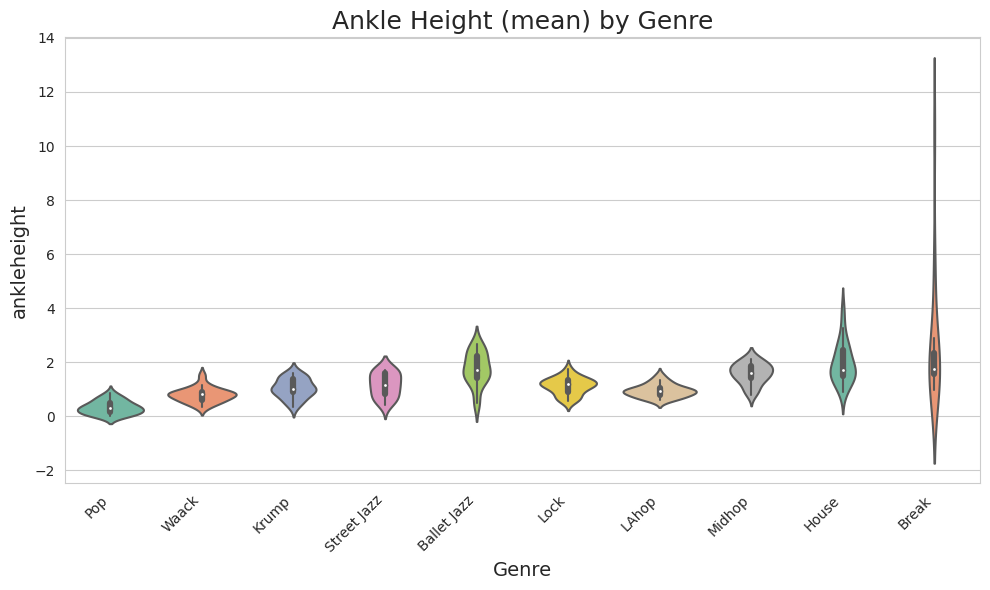

In [ ]:
#Violion plot of ankleheight on y axis, dance genre on X axis, ordered by ankleheight
#move everything up on the y axis so the lowest value is 0
dfFM_scaled['ankleheight'] = dfFM_scaled['ankleheight'] - dfFM_scaled['ankleheight'].min()
plt.figure(figsize=(10, 6))
colors = sns.color_palette('Set2', n_colors=10)
sns.violinplot(data=dfFM_scaled.sort_values(by='ankleheight'), x='Genre', y='ankleheight', palette=colors)
plt.title('Ankle Height (mean) by Genre', fontsize=18)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('ankleheight', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../plots/feature_plots/ankleheightviolin.png')
plt.show()




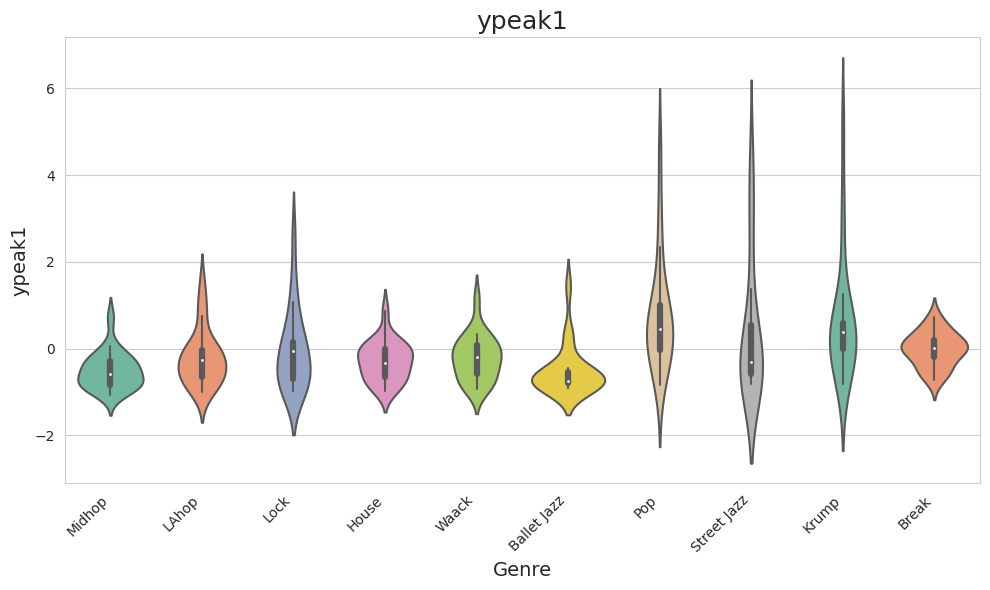

In [ ]:
#Violion plot of ypeak1 on y axis, dance genre on X axis, ordered by ypeak1
plt.figure(figsize=(10, 6))
colors = sns.color_palette('Set2', n_colors=10)
sns.violinplot(data=dfFM_scaled.sort_values(by='ypeak1'), x='Genre', y='ypeak1', palette=colors)
plt.title('ypeak1', fontsize=18)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('ypeak1', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
#plt.savefig('../plots/feature_plots/ypeak1violin.png')
plt.show()

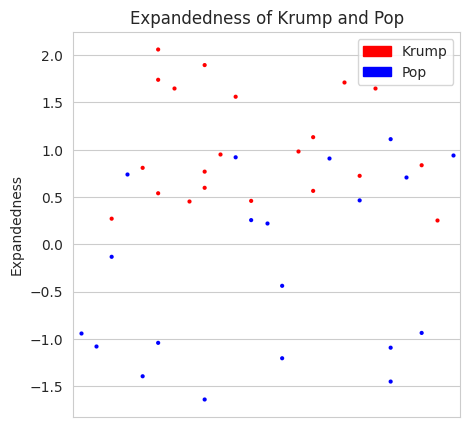

In [15]:
import matplotlib.patches as mpatches
dfAKrump_scaled['Genre_Color'] = 'red'
dfAPop_scaled['Genre_Color'] = 'blue'

# concatenate the Krump and Pop dataframes and add a new column with random integers
df_KrumpPop = pd.concat([dfAKrump_scaled, dfAPop_scaled])
df_KrumpPop['rand'] = np.random.randint(1, len(df_KrumpPop)+1, size=len(df_KrumpPop))

# plot the data using the random integers as x-axis values
fig, ax = plt.subplots(figsize=(5,5))
sns.swarmplot(data=df_KrumpPop[['Expandedness', 'rand', 'Genre_Color']], x='rand', y='Expandedness', hue='Genre_Color', palette=['blue', 'red'], size=3)
plt.title('Expandedness of Krump and Pop')
ax.set(xticklabels=[])
ax.set_xlabel('')

# Create the legend
red_patch = mpatches.Patch(color='red', label='Krump')
blue_patch = mpatches.Patch(color='blue', label='Pop')
plt.legend(handles=[red_patch, blue_patch])
plt.savefig('../plots/feature_plots/ExpandednessswarmKrumpPop.png')
plt.show()


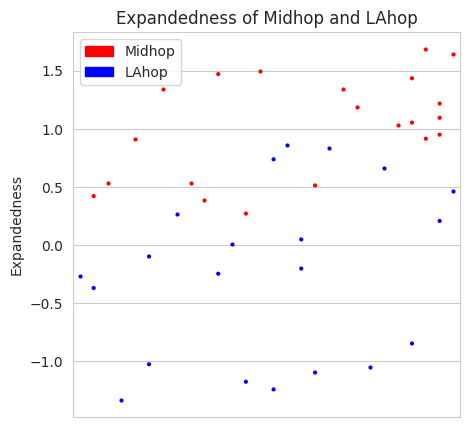

In [ ]:
import matplotlib.patches as mpatches
dfAMidhop_scaled['Genre_Color'] = 'red'
dfALAhop_scaled['Genre_Color'] = 'blue'

# concatenate the Midhop and LAhop dataframes and add a new column with random integers
df_MidhopLAhop = pd.concat([dfAMidhop_scaled, dfALAhop_scaled])
df_MidhopLAhop['rand'] = np.random.randint(1, len(df_MidhopLAhop)+1, size=len(df_MidhopLAhop))

# plot the data using the random integers as x-axis values
fig, ax = plt.subplots(figsize=(5,5))
sns.swarmplot(data=df_MidhopLAhop[['Expandedness', 'rand', 'Genre_Color']], x='rand', y='Expandedness', hue='Genre_Color', palette=['blue', 'red'], size=3)
plt.title('Expandedness of Midhop and LAhop')
ax.set(xticklabels=[])
ax.set_xlabel('')

# Create the legend
red_patch = mpatches.Patch(color='red', label='Midhop')
blue_patch = mpatches.Patch(color='blue', label='LAhop')
plt.legend(handles=[red_patch, blue_patch])
plt.savefig('../plots/feature_plots/ExpandednessswarmMidhopLAhop.png')
plt.show()


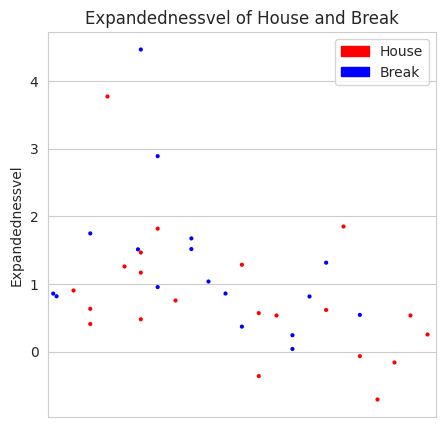

In [ ]:
dfAHouse_scaled['Genre_Color'] = 'red'
dfABreak_scaled['Genre_Color'] = 'blue'

# concatenate the House and Break dataframes and add a new column with random integers
df_HouseBreak = pd.concat([dfAHouse_scaled, dfABreak_scaled])
df_HouseBreak['rand'] = np.random.randint(1, len(df_HouseBreak)+1, size=len(df_HouseBreak))

# plot the data using the random integers as x-axis values
fig, ax = plt.subplots(figsize=(5,5))
sns.swarmplot(data=df_HouseBreak[['Expandednessvel', 'rand', 'Genre_Color']], x='rand', y='Expandednessvel', hue='Genre_Color', palette=['blue', 'red'], size=3)
plt.title('Expandednessvel of House and Break')
ax.set(xticklabels=[])
ax.set_xlabel('')

# Create the legend
red_patch = mpatches.Patch(color='red', label='House')
blue_patch = mpatches.Patch(color='blue', label='Break')
plt.legend(handles=[red_patch, blue_patch])
plt.savefig('../plots/feature_plots/ExpandednessvelswarmHouseBreak.png')
plt.show()

In [18]:
#list all the features
dfFM_scaled.columns

Index(['sacrumstd', 'sacrumjerkmag', 'sacrumjerky', 'angularmomentumxz',
       'angularmomentumy', 'angularmomentumxzstd', 'angularmomentumystd',
       'ypeaks', 'xzpeaks', 'wristacceleration', 'wristaccstd',
       'ankleacceleration', 'ankleaccstd', 'ankleheight', 'ankleheightstd',
       'Expandedness', 'Expandedness_std', 'Genre'],
      dtype='object')

/tmp/ipykernel_1224/1776881577.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(dfBM_scaled.corr(), interpolation='nearest', fignum=1)


<function matplotlib.pyplot.show(close=None, block=None)>

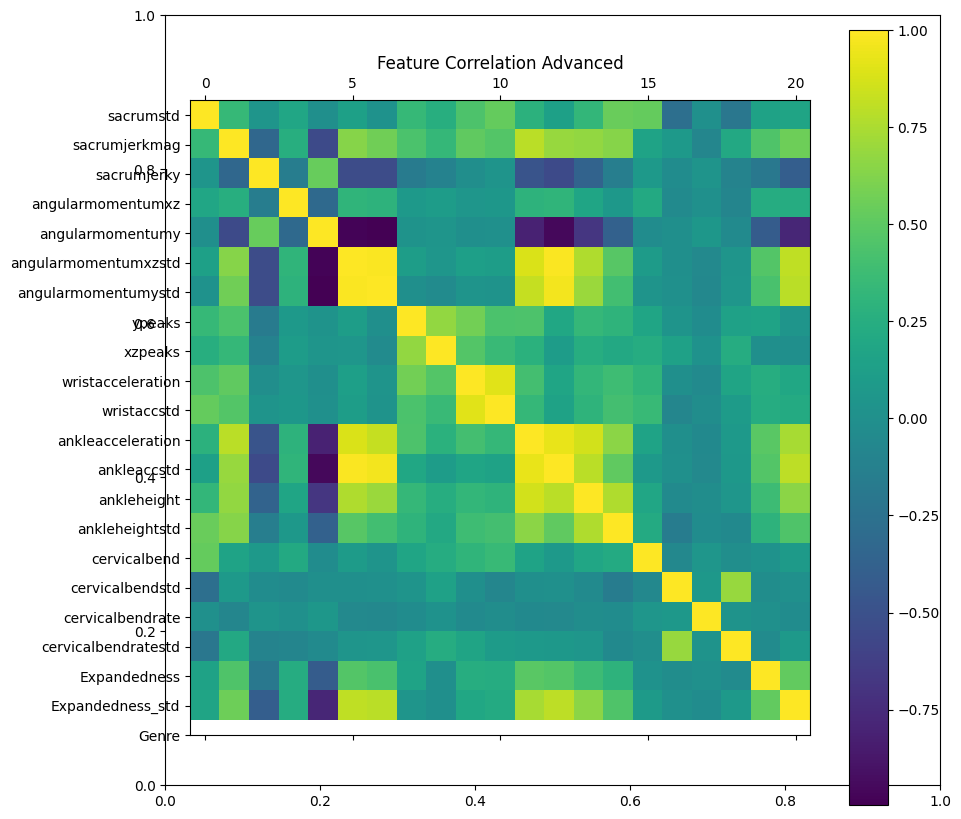

In [17]:
fig = plt.subplots(figsize=(10, 10))
plt.matshow(dfBM_scaled.corr(), interpolation='nearest', fignum=1)
plt.title('Feature Correlation Advanced')
plt.yticks(range(len(dfBM_scaled.columns)), dfBM_scaled.columns)
plt.colorbar()

#plt.savefig('AdvFeatCorr_563.png')
plt.show

In [ ]:
#same corr mat plot as above but for four different genres, break pop house and krump
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

/tmp/ipykernel_485/3418199185.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  axs[0, 1].matshow(dfAPop_scaled.corr())
/tmp/ipykernel_485/3418199185.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  axs[1, 1].matshow(dfAKrump_scaled.corr())


<function matplotlib.pyplot.show(close=None, block=None)>

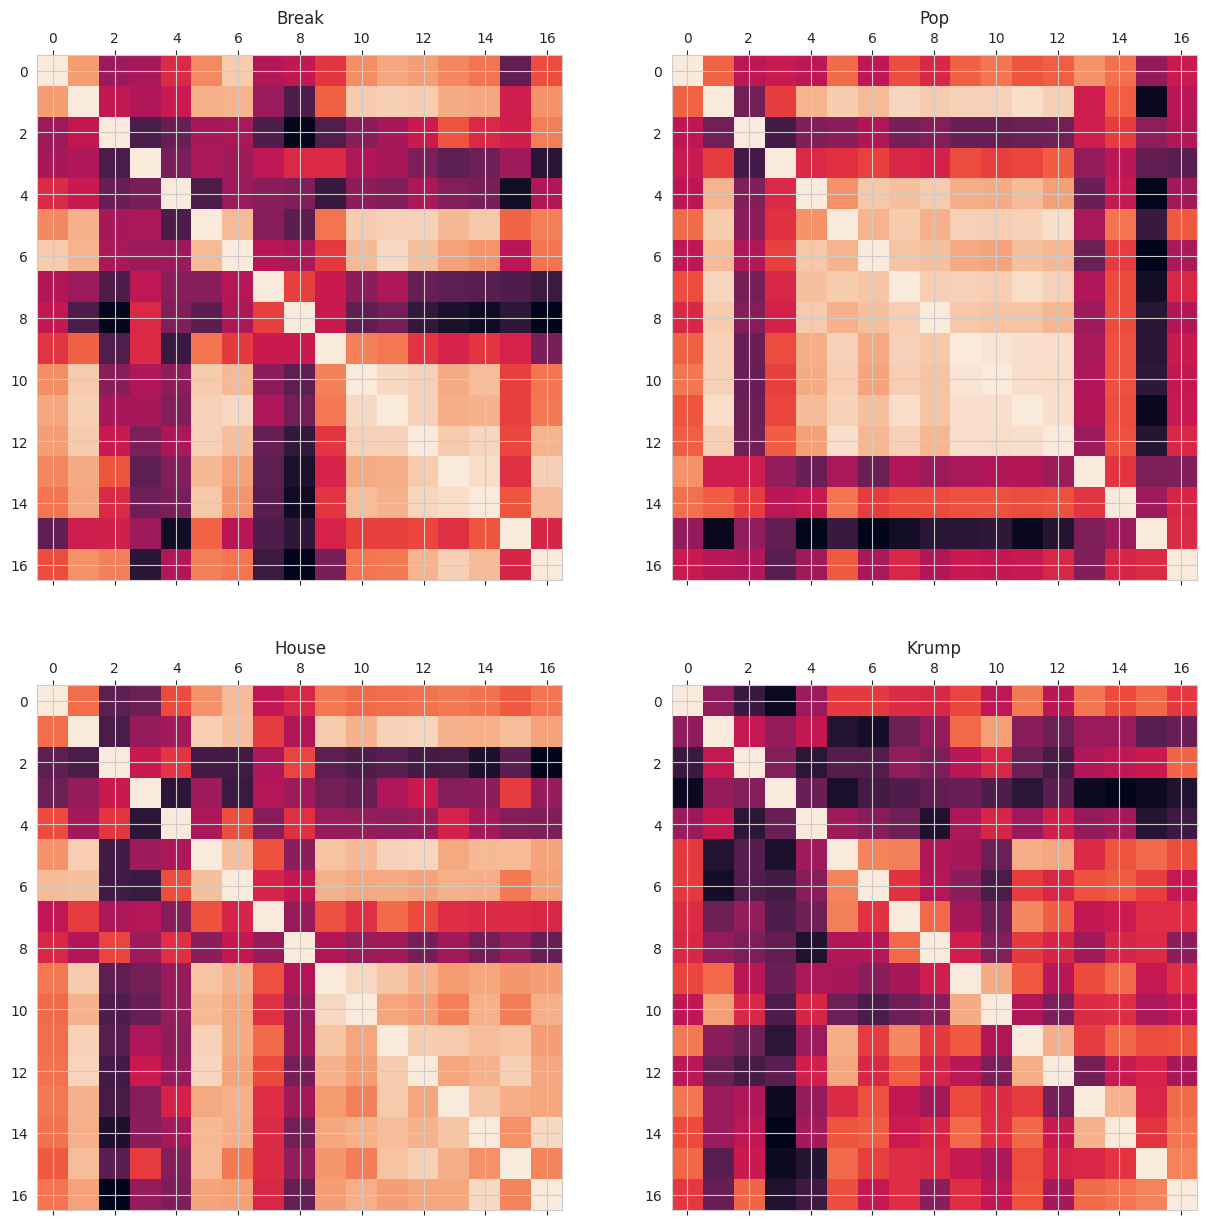

In [23]:
# two by two subplots of the correlation matrices for Break, Pop, House, Krump
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0, 0].matshow(dfABreak_scaled.corr())
axs[0, 0].set_title('Break')
axs[0, 1].matshow(dfAPop_scaled.corr())
axs[0, 1].set_title('Pop')
axs[1, 0].matshow(dfAHouse_scaled.corr())
axs[1, 0].set_title('House')
axs[1, 1].matshow(dfAKrump_scaled.corr())
axs[1, 1].set_title('Krump')
plt.savefig('AdvFeatCorr_BreakPopHouseKrump_sparse.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

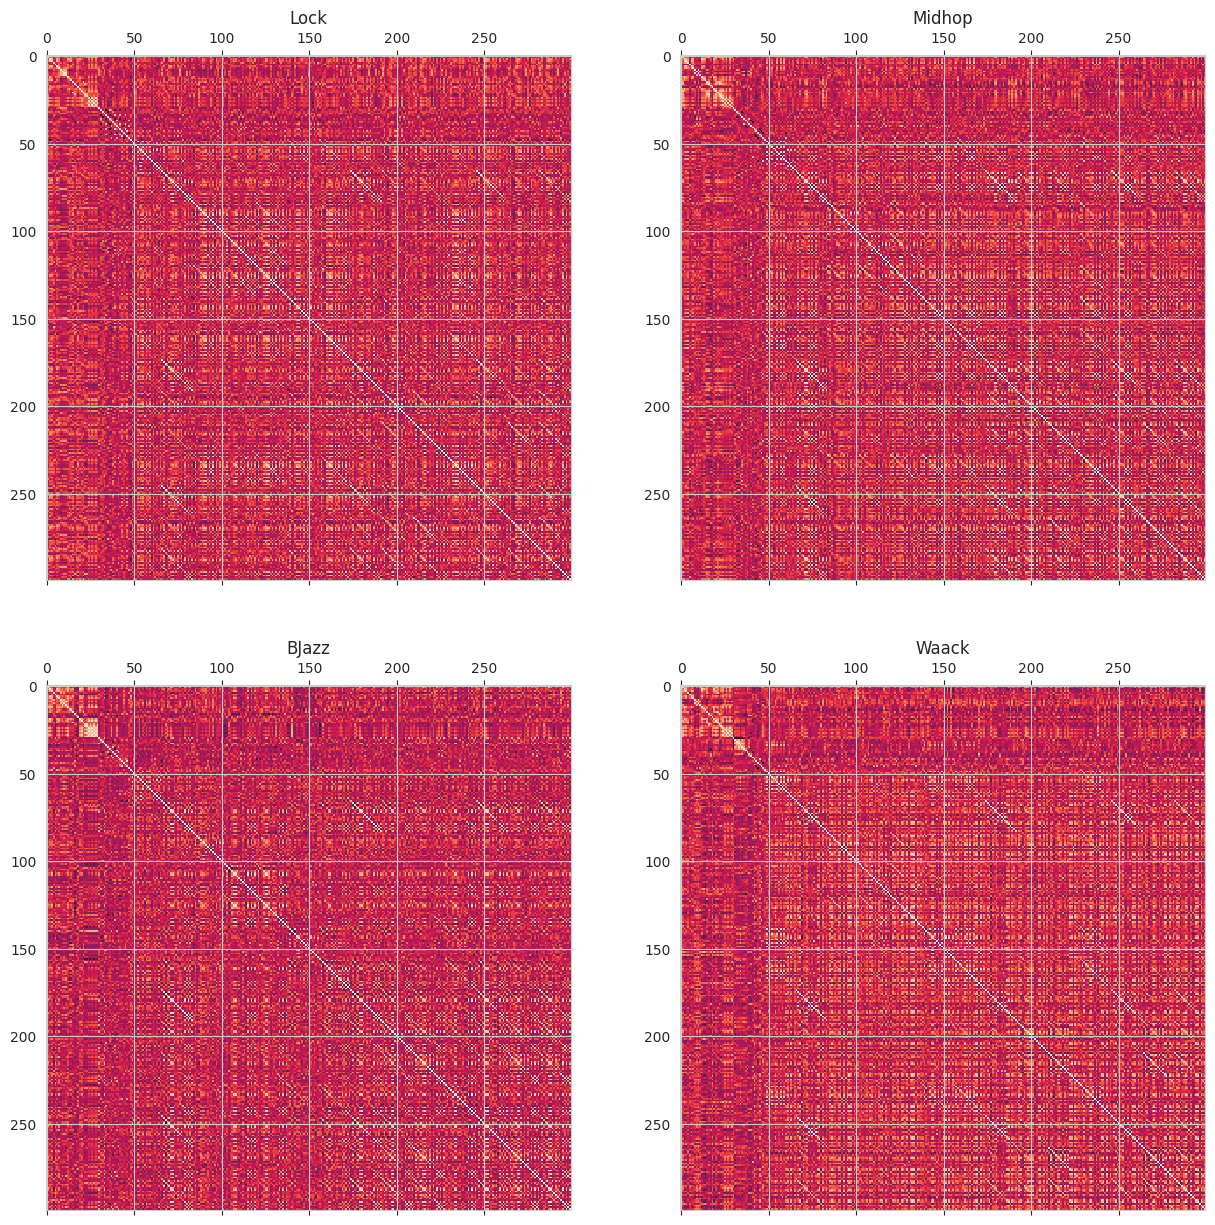

In [21]:
# two by two subplots of the correlation matrices for Lock, Midhop, BJazz, Waack, Basic
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0, 0].matshow(dfALock_scaled.corr())
axs[0, 0].set_title('Lock')
axs[0, 1].matshow(dfAMidhop_scaled.corr())
axs[0, 1].set_title('Midhop')
axs[1, 0].matshow(dfABJazz_scaled.corr())
axs[1, 0].set_title('BJazz')
axs[1, 1].matshow(dfAWaack_scaled.corr())
axs[1, 1].set_title('Waack')
plt.savefig('SparseCorr_LockMidhopBJazzWaack.png')
plt.show

In [ ]:
# two by two subplots of the correlation matrices for LAhop, SJazz, House, Krump
fig, axs = plt.subplots(1, 2, figsize=(10, 20))
axs[0].matshow(dfALAhop.corr())
axs[0].set_title('LAhop')
axs[1].matshow(dfASJazz.corr())
axs[1].set_title('SJazz')
plt.savefig('SpraseCorr_LAhopSJazz.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

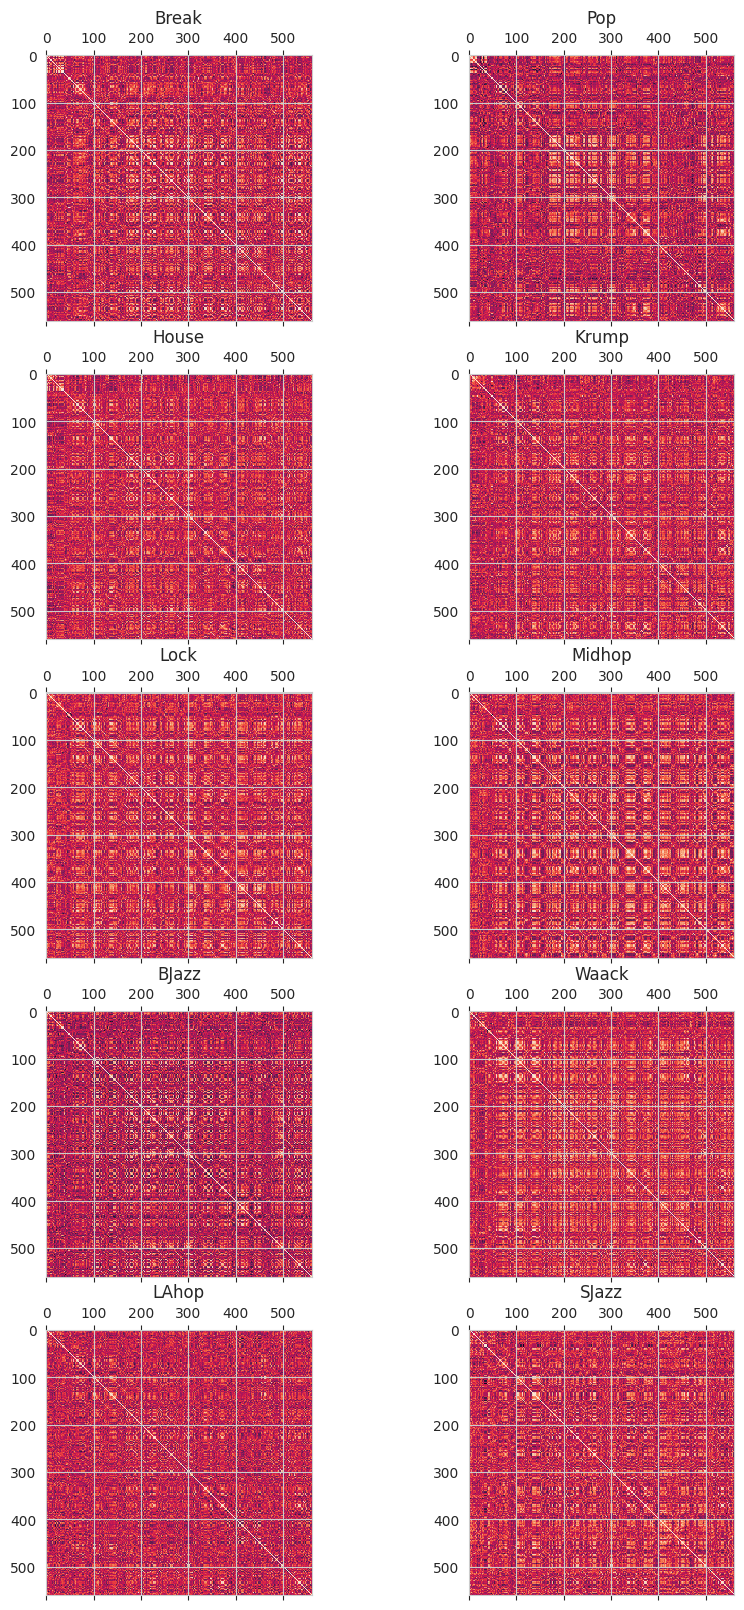

In [17]:
fig, axs = plt.subplots(5, 2, figsize=(10, 20))

axs[0, 0].matshow(dfABreak.corr())
axs[0, 0].set_title('Break')
axs[0, 1].matshow(dfAPop.corr())
axs[0, 1].set_title('Pop')
axs[1, 0].matshow(dfAHouse.corr())
axs[1, 0].set_title('House')
axs[1, 1].matshow(dfAKrump.corr())
axs[1, 1].set_title('Krump')
axs[2, 0].matshow(dfALock.corr())
axs[2, 0].set_title('Lock')
axs[2, 1].matshow(dfAMidhop.corr())
axs[2, 1].set_title('Midhop')
axs[3, 0].matshow(dfABJazz.corr())
axs[3, 0].set_title('BJazz')
axs[3, 1].matshow(dfAWaack.corr())
axs[3, 1].set_title('Waack')
axs[4, 0].matshow(dfALAhop.corr())
axs[4, 0].set_title('LAhop')
axs[4, 1].matshow(dfASJazz.corr())
axs[4, 1].set_title('SJazz')
plt.savefig('featurecorr_genres_500+.png')
plt.show

In [38]:
#make df of features by genre
features = dfFM.columns.drop('id').drop('Genre')
features

Index(['angularmomentum', 'angularmomentumstd', 'wristacceleration',
       'wristaccstd', 'ankleacceleration', 'ankleaccstd', 'Expandedness',
       'Expandedness_std', 'Asym_RL_acc', 'Asym_IO_acc', 'Asym_TB_acc',
       'lastpeak_ywrists', 'prominence1_ywrists', 'peak1_ywrists',
       'lastpeak_xzwrists', 'onehit_ywrists', 'onehit_xzwrists',
       'promstd_xzwrists', 'promstd_ywrists', 'peak2_ywrists',
       'prominence2_ywrists', 'peak3_ywrists', 'prominence3_ywrists',
       'peak1_xzwrists', 'prominence1_xzwrists', 'peak2_xzwrists',
       'prominence2_xzwrists', 'peak3_xzwrists', 'prominence3_xzwrists',
       'lastpeak_ycontralatRsLk', 'prominence1_ycontralatRsLk',
       'peak1_ycontralatRsLk', 'lastpeak_xzcontralatRsLk',
       'onehit_ycontralatRsLk', 'onehit_xzcontralatRsLk',
       'promstd_xzcontralatRsLk', 'promstd_ycontralatRsLk',
       'peak2_ycontralatRsLk', 'prominence2_ycontralatRsLk',
       'peak3_ycontralatRsLk', 'prominence3_ycontralatRsLk',
       'peak1_xzc

In [39]:
#make df of features by genre
features = dfFM.columns.drop('Genre').drop('id')


featuresdf = pd.DataFrame(columns=dfFM['Genre'].unique(), index=features)
#remove genre row

for i, feature in enumerate(features):
    for genre in dfFM['Genre'].unique():
        featuresdf.iloc[i][genre] = dfFM[feature][dfFM['Genre']==genre].mean()

# z scale columns of featuresdf
featuresdf_norm = featuresdf.to_numpy()
for i in range(len(featuresdf_norm)):
    featuresdf_norm[i] = (featuresdf_norm[i] - featuresdf_norm[i].mean())/featuresdf_norm[i].std()

featuresdf_norm = pd.DataFrame(featuresdf_norm, columns=featuresdf.columns, index=featuresdf.index)
featuresdf_norm.head()

/tmp/ipykernel_4044/4127840149.py:15: RuntimeWarning: invalid value encountered in double_scalars
  featuresdf_norm[i] = (featuresdf_norm[i] - featuresdf_norm[i].mean())/featuresdf_norm[i].std()
/tmp/ipykernel_4044/4127840149.py:15: RuntimeWarning: invalid value encountered in divide
  featuresdf_norm[i] = (featuresdf_norm[i] - featuresdf_norm[i].mean())/featuresdf_norm[i].std()


Break       Pop      Lock    Midhop     LAhop  \
angularmomentum     0.410019 -0.060156 -1.033887  1.877834 -0.870557   
angularmomentumstd       NaN       NaN       NaN       NaN       NaN   
wristacceleration   1.067036 -2.088936 -0.410257  0.806022 -0.266538   
wristaccstd         0.732493 -2.031023 -0.253707  0.272979 -0.683067   
ankleacceleration   1.592322 -1.305165 -0.371371  0.878738 -0.339117   

                       House     Waack     Krump Street Jazz Ballet Jazz  
angularmomentum     1.657839 -0.343696 -1.027009   -0.733928    0.123542  
angularmomentumstd       NaN       NaN       NaN         NaN         NaN  
wristacceleration   0.865092 -0.457329  0.285974   -1.029614     1.22855  
wristaccstd          -0.2166 -0.522607  0.776503   -0.026698    1.951725  
ankleacceleration   1.425748 -0.828722 -0.469574    -1.19311     0.61025

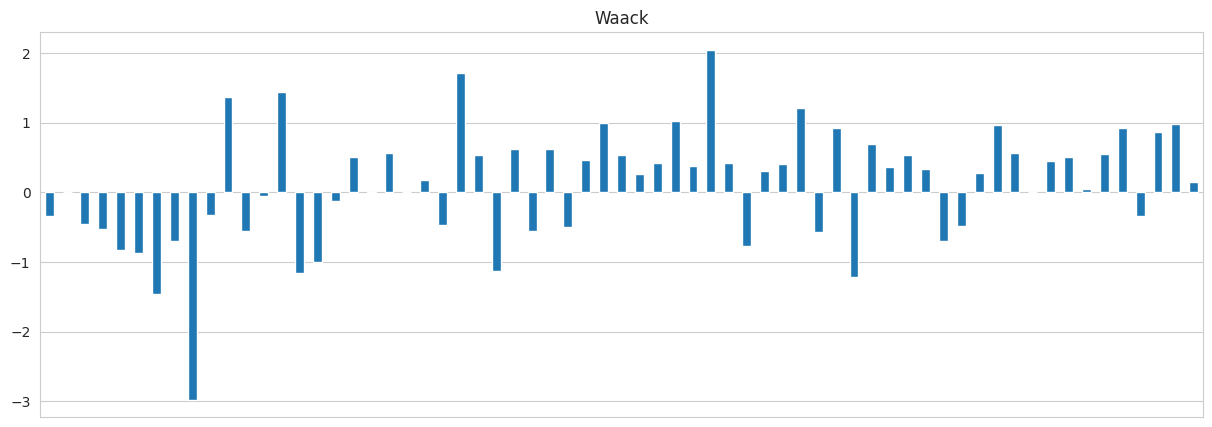

In [40]:
#bar plot of Waack, normalized features values 
featuresdf_norm['Waack'].plot(kind='bar', figsize=(15, 5))
plt.title('Waack')
plt.xticks([])
#plt.savefig('WaackFeatures.png')
plt.show()




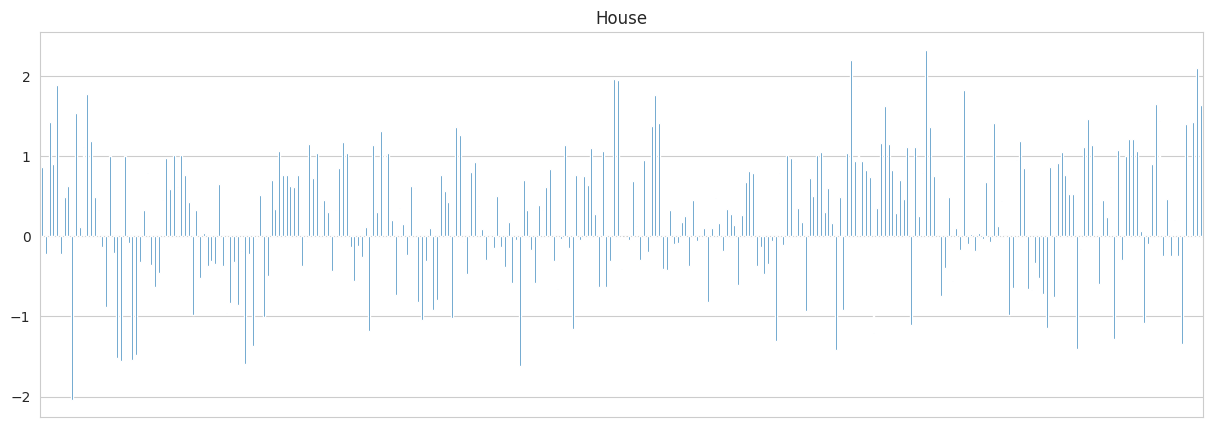

In [22]:
#bar plot of House, normalized features values 
featuresdf_norm['House'].plot(kind='bar', figsize=(15, 5))
plt.title('House')
plt.xticks([])
#plt.savefig('HouseFeatures.png')
plt.show()

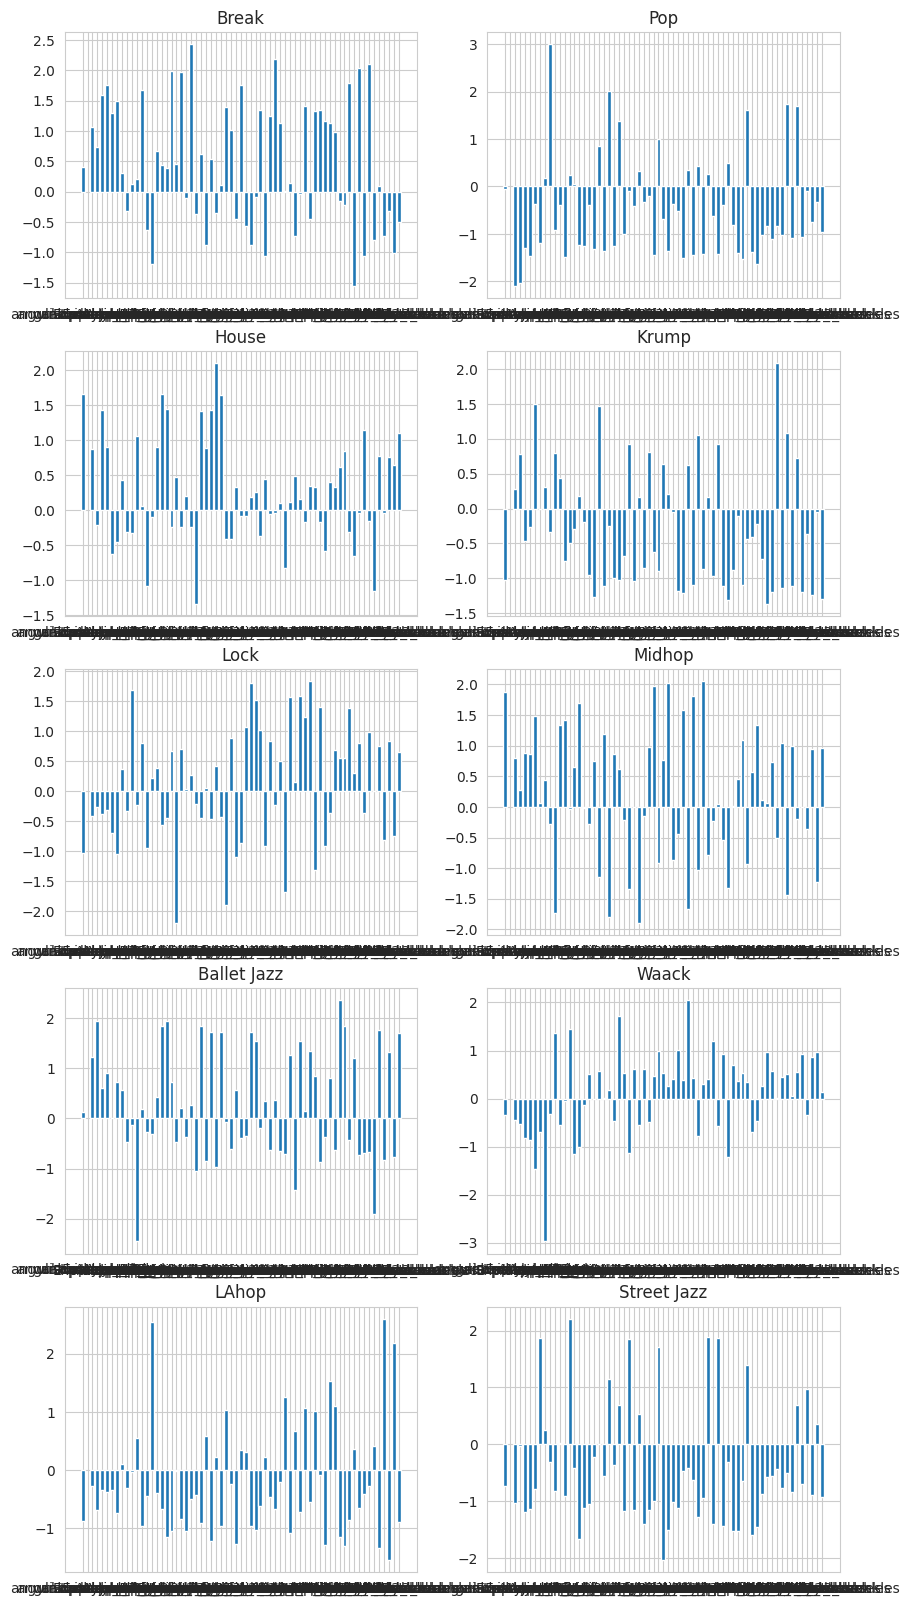

In [42]:
fig, axs = plt.subplots(5, 2, figsize=(10, 20))

axs[0, 0].bar(featuresdf_norm.index, featuresdf_norm['Break'])
axs[0, 0].set_title('Break')
axs[0, 1].bar(featuresdf_norm.index, featuresdf_norm['Pop'])
axs[0, 1].set_title('Pop')
axs[1, 0].bar(featuresdf_norm.index, featuresdf_norm['House'])
axs[1, 0].set_title('House')
axs[1, 1].bar(featuresdf_norm.index, featuresdf_norm['Krump'])
axs[1, 1].set_title('Krump')
axs[2, 0].bar(featuresdf_norm.index, featuresdf_norm['Lock'])
axs[2, 0].set_title('Lock')
axs[2, 1].bar(featuresdf_norm.index, featuresdf_norm['Midhop'])
axs[2, 1].set_title('Midhop')
axs[3, 0].bar(featuresdf_norm.index, featuresdf_norm['Ballet Jazz'])
axs[3, 0].set_title('Ballet Jazz')
axs[3, 1].bar(featuresdf_norm.index, featuresdf_norm['Waack'])
axs[3, 1].set_title('Waack')
axs[4, 0].bar(featuresdf_norm.index, featuresdf_norm['LAhop'])
axs[4, 0].set_title('LAhop')
axs[4, 1].bar(featuresdf_norm.index, featuresdf_norm['Street Jazz'])
axs[4, 1].set_title('Street Jazz')
plt.savefig('featurebar_genres_sparse.png')
plt.show()